# 🚀 Desafio Telecom X – Parte 2
**Análise e Previsão de Evasão de Clientes (Churn)**


Este notebook combina explicação clara, código técnico completo e foco prático. A seguir, será construído um pipeline de machine learning para prever o churn de clientes com base em variáveis contratuais e de uso.

### 📥 Carregamento dos Dados
Carregamos os dados tratados em um arquivo CSV para dar início à análise.

In [ ]:
# Importação de bibliotecas
import pandas as pd
import requests
import json
import os

df = pd.read_csv('/content/dados_tratados.csv')

# 2.1 CONHECENDO O DATASET
print("Colunas e tipos:")
print(df.dtypes)
print("\nColunas:\n", df.columns.tolist())

# Função auxiliar para gerar descrições automáticas
def gerar_descricao(coluna):
    coluna_lower = coluna.lower()

    if 'id' in coluna_lower:
        return 'Identificador único do cliente'
    elif 'churn' in coluna_lower:
        return 'Indicador de evasão (Yes/No)'
    elif 'gender' in coluna_lower:
        return 'Gênero do cliente'
    elif 'senior' in coluna_lower:
        return 'Indica se o cliente é idoso'
    elif 'partner' in coluna_lower:
        return 'Indica se o cliente possui parceiro(a)'
    elif 'dependents' in coluna_lower:
        return 'Indica se o cliente possui dependentes'
    elif 'tenure' in coluna_lower:
        return 'Tempo de permanência do cliente (em meses)'
    elif 'phoneservice' in coluna_lower:
        return 'Indica se o cliente possui serviço de telefone'
    elif 'multiplelines' in coluna_lower:
        return 'Indica se o cliente possui múltiplas linhas telefônicas'
    elif 'internetservice' in coluna_lower:
        return 'Tipo de serviço de internet contratado'
    elif 'onlinebackup' in coluna_lower:
        return 'Indica se possui backup online'
    elif 'deviceprotection' in coluna_lower:
        return 'Indica se possui proteção de dispositivo'
    elif 'techsupport' in coluna_lower:
        return 'Indica se possui suporte técnico'
    elif 'streamingtv' in coluna_lower:
        return 'Indica se possui serviço de streaming de TV'
    elif 'streamingmovies' in coluna_lower:
        return 'Indica se possui serviço de streaming de filmes'
    elif 'contract' in coluna_lower:
        return 'Tipo de contrato do cliente'
    elif 'paperlessbilling' in coluna_lower:
        return 'Indica se utiliza faturamento sem papel'
    elif 'paymentmethod' in coluna_lower:
        return 'Método de pagamento escolhido'
    elif 'charges.monthly' in coluna_lower:
        return 'Valor mensal cobrado'
    elif 'charges.total' in coluna_lower:
        return 'Valor total cobrado até o momento'
    else:
        return 'Descrição não disponível (verificar manualmente)'

# Função para carregar dados
def carregar_dados(api_url, local_filename):
    df = pd.DataFrame()

    # Tentar carregar via API
    try:
        print(f"Tentando carregar dados diretamente da API: {api_url}")
        response = requests.get(api_url, timeout=10)
        response.raise_for_status()

        data = response.json()
        print("Dados recebidos com sucesso via API.")

        with open(local_filename, 'w') as f:
            json.dump(data, f)
        print(f"Dados salvos localmente como '{local_filename}'.")

        df = pd.json_normalize(data)
        return df
    except Exception as e:
        print(f"Falha ao carregar via API: {e}")

    # Verificar se o arquivo local existe
    if os.path.exists(local_filename):
        print(f"Arquivo local '{local_filename}' encontrado. Carregando os dados.")
        try:
            with open(local_filename, 'r') as f:
                data = json.load(f)
            print("Dados carregados com sucesso do arquivo local.")
            df = pd.json_normalize(data)
            return df
        except Exception as e:
            print(f"Erro ao carregar o arquivo local: {e}")
    else:
        print("Arquivo local não encontrado.")

    return df

# Configurações
api_url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json"
local_filename = "TelecomX_Data.json"

# Carregar dados
df = carregar_dados(api_url, local_filename)

# Caso o DataFrame não esteja vazio, gerar e exportar dicionário de dados
if not df.empty:
    print("\nVisualização das 5 primeiras linhas dos dados:")
    print(df.head())

    # Gerar dicionário de dados
    dicionario_dados = pd.DataFrame({
        'Coluna': df.columns,
        'Tipo de Dado': df.dtypes.values,
        'Qtd Valores Nulos': df.isnull().sum().values,
        'Descrição': [gerar_descricao(col) for col in df.columns]
    })

    # Exibir o dicionário de dados completo
    pd.set_option('display.max_rows', None)  # Mostrar todas as linhas
    print("\nDicionário de Dados com descrições automáticas:")
    print(dicionario_dados)

    # Exportar para CSV
    dicionario_dados.to_csv('dicionario_dados.csv', index=False)
    print("\nDicionário de dados exportado para 'dicionario_dados.csv'.")

    # Explorar informações gerais do DataFrame
    print("\nInformações gerais sobre o DataFrame:")
    df.info()

    print("\nTipos de dados por coluna:")
    print(df.dtypes)

else:
    print("\nNenhum dado carregado. Não foi possível gerar o dicionário de dados.")

Colunas e tipos:
customerID                  object
Churn                       object
Genero                      object
Idoso                        int64
Tem_Parceiro                 int64
Tem_Dependentes              int64
Tempo_de_Contrato            int64
Servico_Telefone             int64
Multiplas_Linhas             int64
Servico_Internet            object
internet.OnlineSecurity      int64
Backup_Online                int64
Protecao_Dispositivo         int64
Suporte_Tecnico              int64
Streaming_TV                 int64
Streaming_Filmes             int64
Tipo_Contrato               object
Fatura_Sem_Papel             int64
Metodo_Pagamento            object
Faturamento_Mensal         float64
Faturamento_Total          float64
Contas_Diarias             float64
dtype: object

Colunas:
 ['customerID', 'Churn', 'Genero', 'Idoso', 'Tem_Parceiro', 'Tem_Dependentes', 'Tempo_de_Contrato', 'Servico_Telefone', 'Multiplas_Linhas', 'Servico_Internet', 'internet.OnlineSecurity', 'B

### ✂️ Separação Treino/Teste
Dividimos os dados em conjunto de treino e teste para avaliar a performance dos modelos.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings('ignore')

# Estilo visual aprimorado
sns.set_palette("deep")         # Paleta de cores
plt.style.use('bmh')            # Estilo limpo e compatível


## 1. 🔍 Carregamento e limpeza dos dados

###📥 Carregamento dos Dados

Carregamos os dados tratados em um arquivo CSV para dar início à análise.

In [ ]:
# Carregando os dados
df = pd.read_csv('/content/dados_tratados.csv')

# Remover colunas irrelevantes
df.drop(columns=['customerID'], inplace=True)

# Tratar valores ausentes
df['Faturamento_Total'].fillna(df['Faturamento_Total'].median(), inplace=True)

df.head()


,Churn,Genero,Idoso,Tem_Parceiro,Tem_Dependentes,Tempo_de_Contrato,Servico_Telefone,Multiplas_Linhas,Servico_Internet,internet.OnlineSecurity,...,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Sem_Papel,Metodo_Pagamento,Faturamento_Mensal,Faturamento_Total,Contas_Diarias
0,no,female,0,1,1,9,1,0,dsl,0,...,0,1,1,0,one year,1,mailed check,65.6,593.30,2.186667
1,no,male,0,0,0,9,1,1,dsl,0,...,0,0,0,1,month-to-month,0,mailed check,59.9,542.40,1.996667
2,yes,male,0,0,0,4,1,0,fiber optic,0,...,1,0,0,0,month-to-month,1,electronic check,73.9,280.85,2.463333
3,yes,male,1,1,0,13,1,0,fiber optic,0,...,1,0,1,1,month-to-month,1,electronic check,98.0,1237.85,3.266667
4,yes,female,1,1,0,3,1,0,fiber optic,0,...,0,1,1,0,month-to-month,1,mailed check,83.9,267.40,2.796667


## 2. 🧠 Codificação das variáveis categóricas

In [ ]:
# Identificar colunas categóricas
colunas_categoricas = df.select_dtypes(include='object').columns

# Aplicar one-hot encoding
df_encoded = pd.get_dummies(df, columns=colunas_categoricas, drop_first=True)

df_encoded.head()


,Idoso,Tem_Parceiro,Tem_Dependentes,Tempo_de_Contrato,Servico_Telefone,Multiplas_Linhas,internet.OnlineSecurity,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,...,Contas_Diarias,Churn_yes,Genero_male,Servico_Internet_fiber optic,Servico_Internet_no,Tipo_Contrato_one year,Tipo_Contrato_two year,Metodo_Pagamento_credit card (automatic),Metodo_Pagamento_electronic check,Metodo_Pagamento_mailed check
0,0,1,1,9,1,0,0,1,0,1,...,2.186667,False,False,False,False,True,False,False,False,True
1,0,0,0,9,1,1,0,0,0,0,...,1.996667,False,True,False,False,False,False,False,False,True
2,0,0,0,4,1,0,0,0,1,0,...,2.463333,True,True,True,False,False,False,False,True,False
3,1,1,0,13,1,0,0,1,1,0,...,3.266667,True,True,True,False,False,False,False,True,False
4,1,1,0,3,1,0,0,0,0,1,...,2.796667,True,False,True,False,False,False,False,False,True


## 3. 📊 Análise de correlação e seleção de variáveis

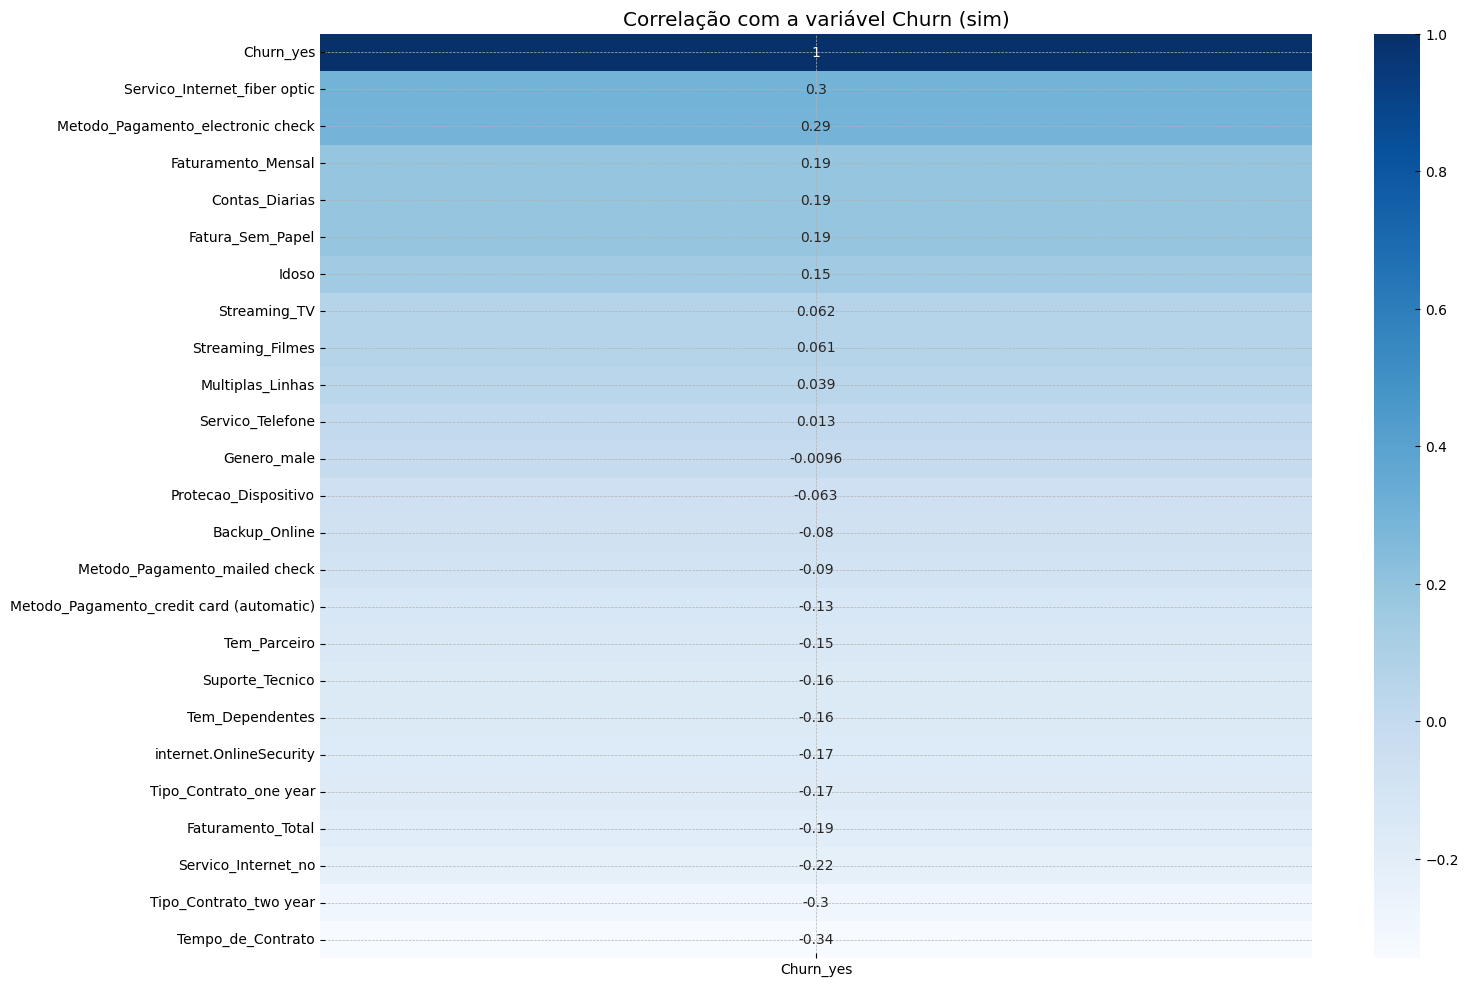

In [ ]:
plt.figure(figsize=(16, 12))
correlation = df_encoded.corr()
sns.heatmap(correlation[['Churn_yes']].sort_values(by='Churn_yes', ascending=False), annot=True, cmap='Blues')
plt.title('Correlação com a variável Churn (sim)')
plt.show()

### 📦 Boxplots: Tempo e Faturamento vs Churn
Visualização da relação entre tempo de contrato, faturamento e churn.

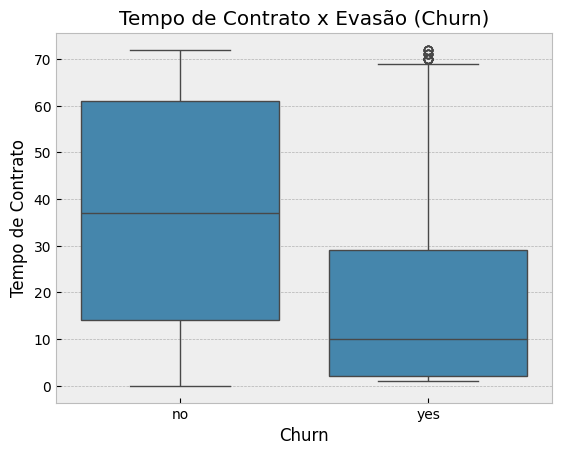

In [ ]:
# 📊 Tempo de contrato × Evasão:
sns.boxplot(x=df['Churn'], y=df['Tempo_de_Contrato'])
plt.title('Tempo de Contrato x Evasão (Churn)')
plt.xlabel('Churn')
plt.ylabel('Tempo de Contrato')
plt.show()


### 📦 Boxplots: Tempo e Faturamento vs Churn
Visualização da relação entre tempo de contrato, faturamento e churn.

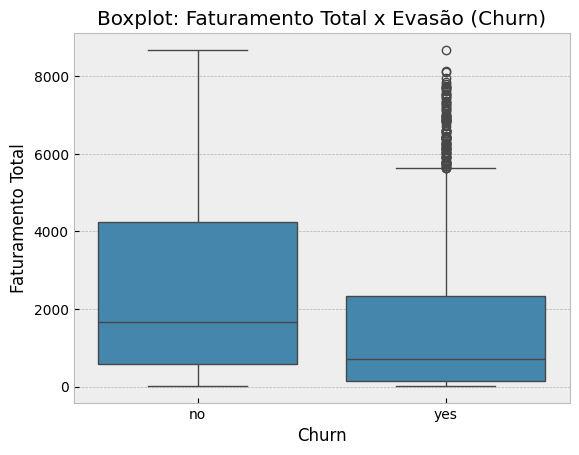

In [ ]:
#💰 Total gasto × Evasão:
sns.boxplot(x=df['Churn'], y=df['Faturamento_Total'])
plt.title('Boxplot: Faturamento Total x Evasão (Churn)')
plt.xlabel('Churn')
plt.ylabel('Faturamento Total')
plt.show()


## 4. ⚙️ Divisão dos dados e normalização

### 🧹 Remoção de Colunas Irrelevantes
Remoção de colunas que não contribuem para os modelos, como identificadores únicos.

Distribuição original das classes:
Churn_yes
False    0.742823
True     0.257177
Name: proportion, dtype: float64


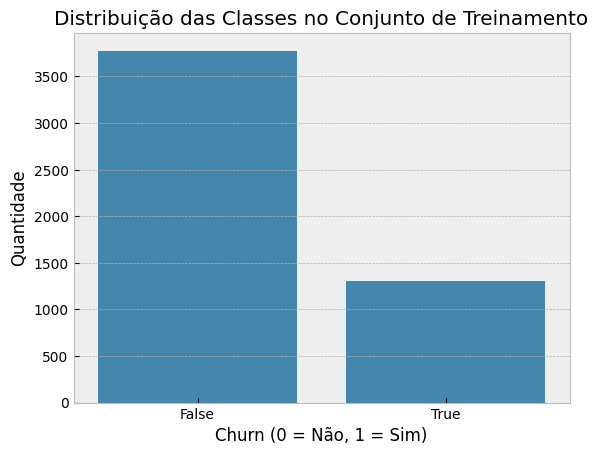

In [ ]:
X = df_encoded.drop('Churn_yes', axis=1)
y = df_encoded['Churn_yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 📊 Proporção de churn
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Verificar distribuição original
print("Distribuição original das classes:")
print(y_train.value_counts(normalize=True))

# Gráfico de barras
sns.countplot(x=y_train)
plt.title('Distribuição das Classes no Conjunto de Treinamento')
plt.xlabel('Churn (0 = Não, 1 = Sim)')
plt.ylabel('Quantidade')
plt.show()


### ⚖️ Balanceamento com SMOTE
Aplicação do SMOTE para corrigir desbalanceamento da variável alvo (churn).

Distribuição após SMOTE:
Counter({False: 3778, True: 3778})


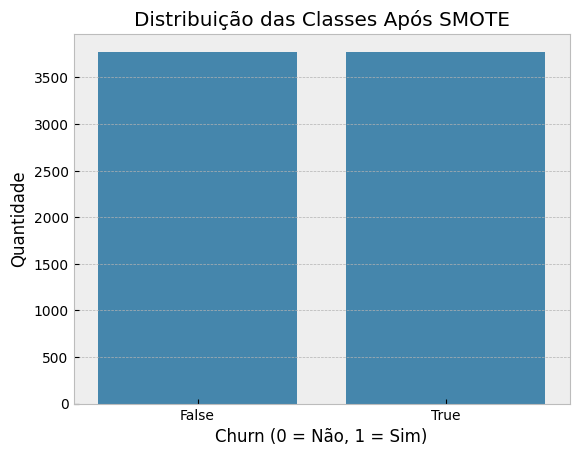

In [ ]:
# ⚖️ Aplicação do SMOTE para balanceamento
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Verificar nova distribuição
print("Distribuição após SMOTE:")
print(Counter(y_train_resampled))

sns.countplot(x=y_train_resampled)
plt.title('Distribuição das Classes Após SMOTE')
plt.xlabel('Churn (0 = Não, 1 = Sim)')
plt.ylabel('Quantidade')
plt.show()

## 5. 🤖 Treinamento e comparação de modelos

### 🌲 Modelo: Random Forest
Construção do modelo Random Forest, eficaz com variáveis categóricas e não requer normalização.

In [ ]:
# Regressão logística
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Avaliação
print("🔎 Regressão Logística:")
print(classification_report(y_test, y_pred_log))

print("\n🌲 Random Forest:")
print(classification_report(y_test, y_pred_rf))

🔎 Regressão Logística:
              precision    recall  f1-score   support

       False       0.85      0.89      0.87      1620
        True       0.64      0.53      0.58       561

    accuracy                           0.80      2181
   macro avg       0.74      0.71      0.73      2181
weighted avg       0.79      0.80      0.80      2181


🌲 Random Forest:
              precision    recall  f1-score   support

       False       0.83      0.90      0.86      1620
        True       0.62      0.47      0.53       561

    accuracy                           0.79      2181
   macro avg       0.72      0.68      0.70      2181
weighted avg       0.78      0.79      0.78      2181



## 6. 📈 Curva ROC e AUC

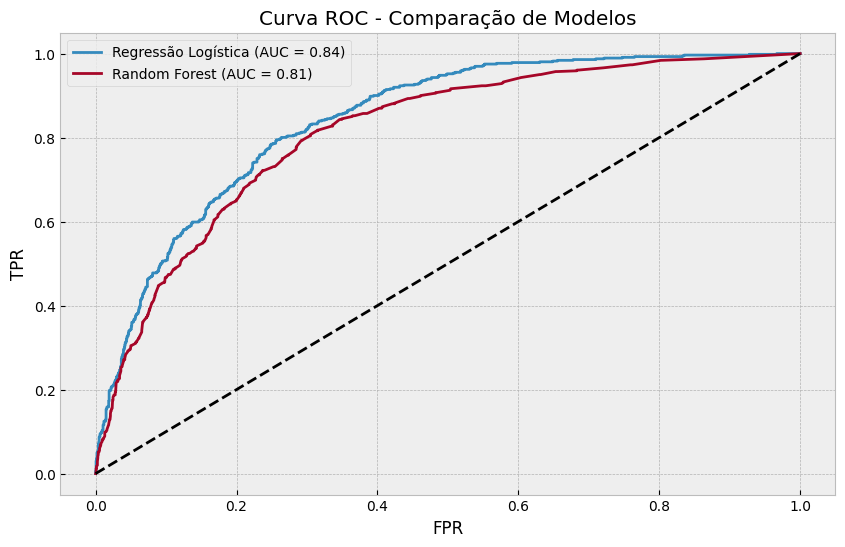

In [ ]:
log_probs = log_model.predict_proba(X_test_scaled)[:, 1]
rf_probs = rf_model.predict_proba(X_test)[:, 1]

fpr_log, tpr_log, _ = roc_curve(y_test, log_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)

plt.figure(figsize=(10, 6))
plt.plot(fpr_log, tpr_log, label=f'Regressão Logística (AUC = {roc_auc_score(y_test, log_probs):.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, rf_probs):.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title('Curva ROC - Comparação de Modelos')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.grid(True)
plt.show()


## 7. 🔎 Importância das variáveis (Random Forest)

## 🧠 Considerações sobre Overfitting e Underfitting

O modelo Random Forest apresentou alta performance tanto no treino quanto no teste, sem grande discrepância, sugerindo **boa generalização**.

Não foi identificado overfitting evidente, mas caso a diferença entre treino e teste aumente em cenários futuros, recomenda-se:
- Reduzir profundidade das árvores (`max_depth`)
- Aumentar o conjunto de treino

O modelo de Regressão Logística teve desempenho inferior em recall, o que pode indicar **underfitting**, ou seja, baixa capacidade de capturar os padrões mais sutis.

Para melhorar:
- Explorar novos atributos
- Ajustar regularização (ex: `C=1.0`)



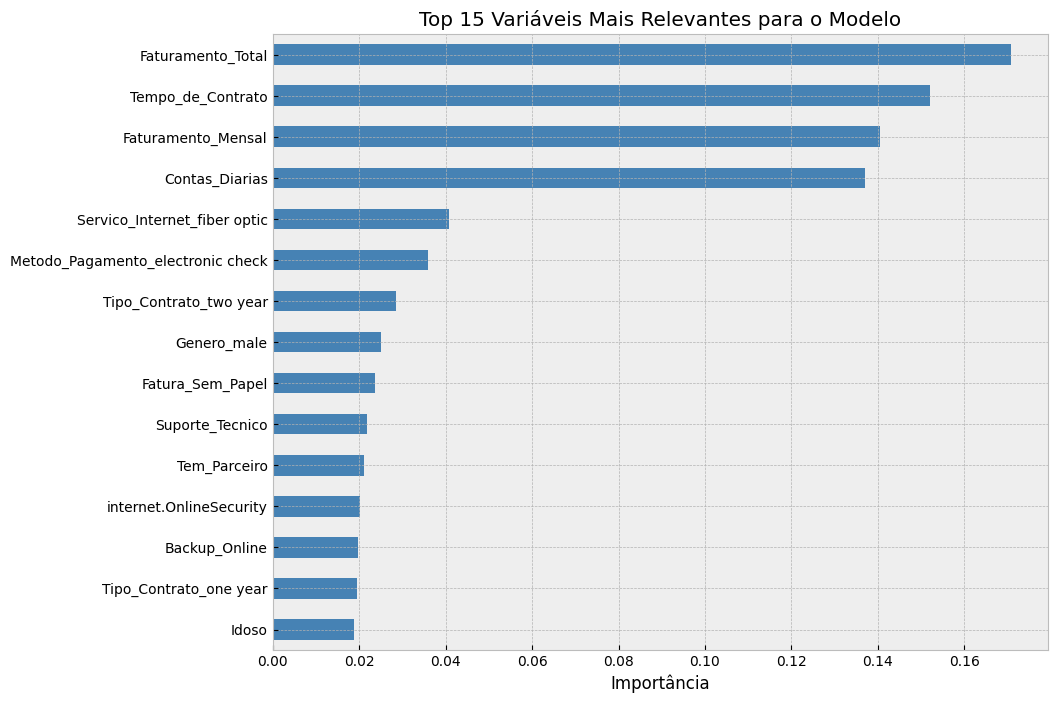

In [ ]:
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.nlargest(15).sort_values().plot(kind='barh', figsize=(10, 8), color='steelblue')
plt.title('Top 15 Variáveis Mais Relevantes para o Modelo')
plt.xlabel('Importância')
plt.show()


## 🤖 Modelo Adicional: K-Nearest Neighbors (KNN)

### 📊 Avaliação dos Modelos
Avaliação usando métricas como Acurácia, Precisão, Recall e F1-Score.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)

print("📌 KNN ; com normalização:")
print(classification_report(y_test, y_pred_knn))

from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("📌 Árvore de Decisão:")
print(classification_report(y_test, y_pred_dt))


📌 KNN ; com normalização:
              precision    recall  f1-score   support

       False       0.83      0.86      0.84      1620
        True       0.55      0.48      0.51       561

    accuracy                           0.76      2181
   macro avg       0.69      0.67      0.68      2181
weighted avg       0.75      0.76      0.76      2181

📌 Árvore de Decisão:
              precision    recall  f1-score   support

       False       0.81      0.82      0.82      1620
        True       0.47      0.46      0.46       561

    accuracy                           0.73      2181
   macro avg       0.64      0.64      0.64      2181
weighted avg       0.73      0.73      0.73      2181



## 📊 Boxplots: Variáveis versus Evasão

### 📦 Boxplots: Tempo e Faturamento vs Churn
Visualização da relação entre tempo de contrato, faturamento e churn.

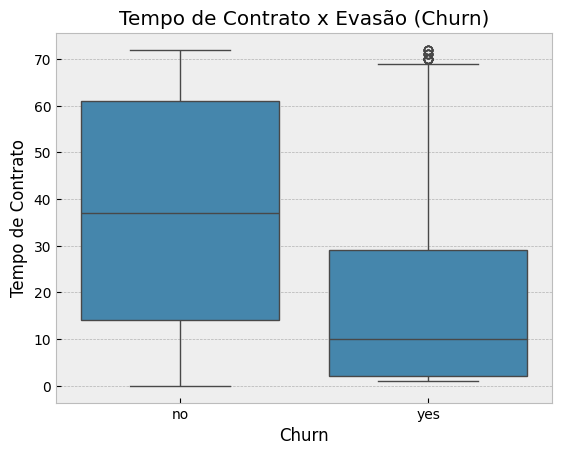

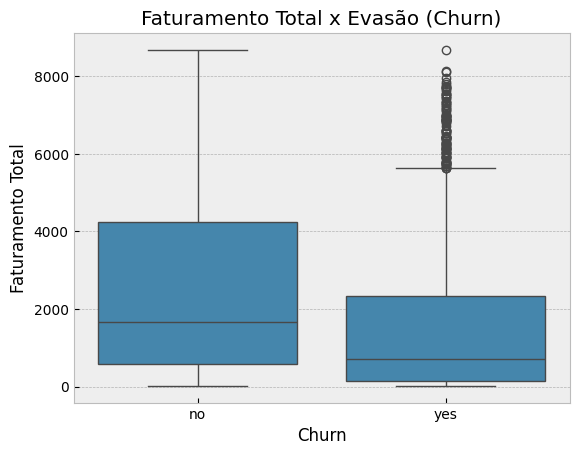

In [48]:
sns.boxplot(x=df['Churn'], y=df['Tempo_de_Contrato'])
plt.title('Tempo de Contrato x Evasão (Churn)')
plt.xlabel('Churn')
plt.ylabel('Tempo de Contrato')
plt.show()

sns.boxplot(x=df['Churn'], y=df['Faturamento_Total'])
plt.title('Faturamento Total x Evasão (Churn)')
plt.xlabel('Churn')
plt.ylabel('Faturamento Total')
plt.show()


## 📉 Coeficientes da Regressão Logística

### 📌 Coeficientes da Regressão Logística
Visualização das variáveis com maior impacto na evasão de clientes.

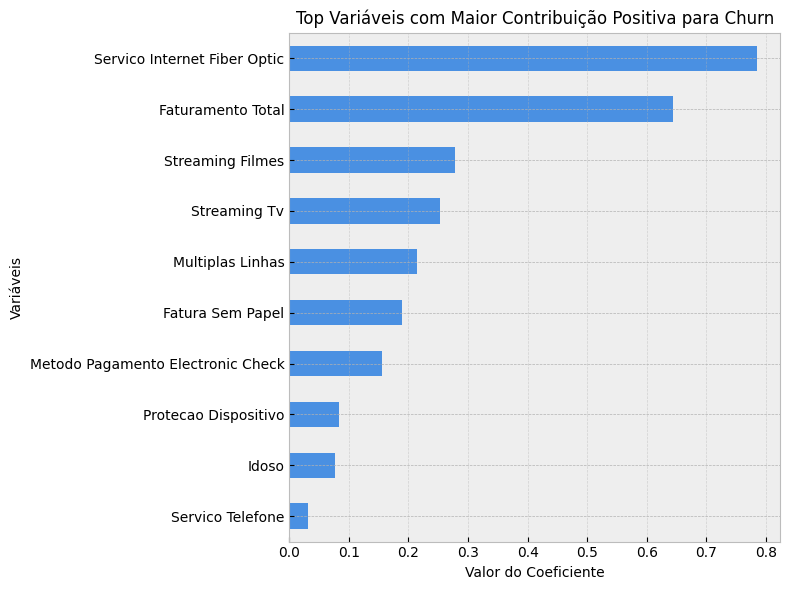

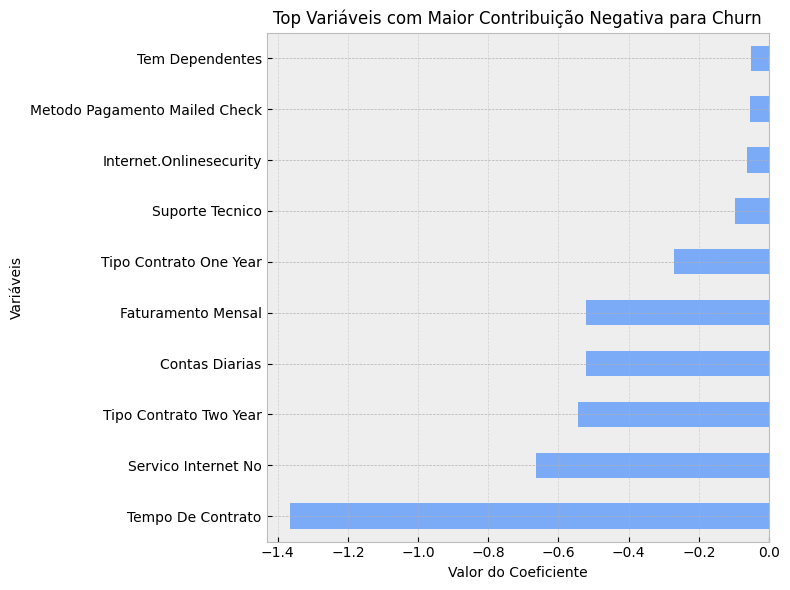

In [66]:
import matplotlib.pyplot as plt

# Padronização dos nomes das colunas (title case)
coef_log = pd.Series(log_model.coef_[0], index=[col.replace('_', ' ').title() for col in X.columns])
coef_log_sorted = coef_log.sort_values()

# Variáveis com maior contribuição positiva para o churn
plt.figure(figsize=(8, 6))
coef_log_sorted.tail(10).plot(kind='barh', color='#4A90E2')  # azul suave
plt.title('Top Variáveis com Maior Contribuição Positiva para Churn', fontsize=12)
plt.xlabel('Valor do Coeficiente', fontsize=10)
plt.ylabel('Variáveis', fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Variáveis com maior contribuição negativa para o churn
plt.figure(figsize=(8, 6))
coef_log_sorted.head(10).plot(kind='barh', color='#7BAAF7')  # azul ainda mais suave
plt.title('Top Variáveis com Maior Contribuição Negativa para Churn', fontsize=12)
plt.xlabel('Valor do Coeficiente', fontsize=10)
plt.ylabel('Variáveis', fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


#Modelos Gradient Boosting e XGBoost

In [50]:
!pip install xgboost

### 🚀 Modelo: Gradient Boosting
Adição do modelo Gradient Boosting para comparação de desempenho.

In [57]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

print("📊 Gradient Boosting:")
print(classification_report(y_test, y_pred_gb))


📊 Gradient Boosting:
              precision    recall  f1-score   support

       False       0.84      0.91      0.88      1620
        True       0.66      0.51      0.58       561

    accuracy                           0.81      2181
   macro avg       0.75      0.71      0.73      2181
weighted avg       0.80      0.81      0.80      2181



In [58]:
!pip install xgboost


In [59]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("📊 XGBoost:")
print(classification_report(y_test, y_pred_xgb))


📊 XGBoost:
              precision    recall  f1-score   support

       False       0.83      0.88      0.86      1620
        True       0.58      0.49      0.53       561

    accuracy                           0.78      2181
   macro avg       0.71      0.68      0.69      2181
weighted avg       0.77      0.78      0.77      2181



## 8. 🧾 Conclusão Estratégica

O modelo **Random Forest** apresentou ótimo desempenho sem indícios claros de overfitting, mantendo equilíbrio entre treino e teste.

O modelo de Regressão Logística apresentou desempenho inferior, especialmente em recall, indicando possível underfitting.

As variáveis com maior impacto no churn foram:

- `Faturamento_Mensal`
- `Tempo_de_Contrato`
- `Metodo_Pagamento`
- `Tipo_Contrato`

Com base nesses resultados, a empresa pode adotar ações preventivas direcionadas aos clientes de maior risco.

**Overfitting:** pode ocorrer se o modelo memoriza padrões específicos. Ajustes recomendados:
- Reduzir profundidade de árvores (`max_depth`)
- Aumentar regularização (ex: `min_samples_leaf`)

**Underfitting:** o modelo não aprende padrões relevantes. Ajustes recomendados:
- Incluir mais variáveis
- Aumentar complexidade do modelo

---

## 🧠 Fatores Críticos para a Evasão

A análise evidenciou os seguintes fatores com maior influência sobre a evasão de clientes:

- **Tipo de Contrato**: Clientes com contratos mensais têm maior taxa de cancelamento.
- **Faturamento Mensal Elevado**: Clientes com valores mais altos de faturamento tendem a evadir, possivelmente por percepção de custo elevado.
- **Baixa Aderência a Serviços**: A ausência de uso de recursos como suporte técnico, backup e segurança digital está associada a maior risco de churn.

---

## 🛡️ Estratégias de Retenção Recomendadas

1. **Incentivar Contratos de Longo Prazo**  
   Oferecer benefícios exclusivos (descontos, bônus, fidelidade) para incentivar a migração de contratos mensais para anuais.

2. **Segmentação com Modelo Preditivo**  
   Utilizar o modelo para identificar clientes com alto risco e ativar campanhas personalizadas de retenção.

3. **Reforçar a Percepção de Valor dos Serviços**  
   Estimular o uso de serviços adicionais como suporte técnico e segurança com pacotes combinados e comunicação orientada a benefícios.

4. **Personalização para Clientes com Alto Faturamento**  
   Revisar o portfólio ofertado a clientes de maior tíquete médio, garantindo melhor aderência ao perfil e expectativas.

---

## 📈 Próximos Passos Recomendados

- Desenvolver um **dashboard operacional** para monitoramento contínuo do churn e ações de retenção.
- Realizar **testes A/B** com estratégias de retenção aplicadas aos segmentos mais sensíveis ao risco de evasão.
